# target 관련 시각화


In [65]:
# 데이터 분석 및 시각화에 필요한 라이브러리들을 가져옵니다.
# pathlib: 파일 경로를 쉽게 다루기 위한 라이브러리
from pathlib import Path
# display: Jupyter Notebook에서 데이터프레임 등을 예쁘게 출력하기 위해 사용
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mstick
import matplotlib.font_manager as fm
import matplotlib as mpl
import pandas as pd
import seaborn as sns

######## 한글 폰트 사용을 위한 설정 ########

font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정
########################################## 

# seaborn의 기본 테마를 설정합니다. 'whitegrid' 스타일과 'crest' 색상 팔레트를 사용합니다.
sns.set_theme(style="whitegrid", palette="crest")

# 시각화에서 한글이 깨지지 않도록 나눔고딕 폰트를 설정합니다.
# 시스템에 폰트가 설치되어 있지 않으면 오류가 발생할 수 있어 try-except 구문으로 감쌌습니다.
try:
    plt.rc('font', family='NanumGothic')
except Exception:
    pass
# 마이너스 부호가 깨지는 것을 방지하는 설정입니다.
plt.rc('axes', unicode_minus=False)

 
DATA_PATH3 = Path('../data/EDA/encoded_dataset_COD.csv')
 
encoded_df = pd.read_csv(DATA_PATH3) 

print(encoded_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593178 entries, 0 to 593177
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Patient ID                                                   593178 non-null  int64  
 1   Age recode with <1 year olds and 90+                         593178 non-null  int64  
 2   Sex                                                          593178 non-null  int64  
 3   Year of diagnosis                                            593178 non-null  int64  
 4   Year of follow-up recode                                     593178 non-null  int64  
 5   Race recode (W, B, AI, API)                                  593178 non-null  int64  
 6   Site recode ICD-O-3/WHO 2008                                 593178 non-null  int64  
 7   Primary Site                                                 5931

In [66]:
# 타겟 레이블 매핑 정의 (생존 제외)
target_labels = {
    0: '암 관련 사망',
    1: '합병증 관련 사망', 
    2: '기타 질환 사망',
    3: '자살/자해'
}

# 타겟 레이블 컬럼 확인
print("=== 데이터 기본 정보 ===")
print(f"데이터 shape: {encoded_df.shape}")
print(f"타겟 레이블 컬럼: target_label")
print(f"타겟 레이블 분포:")
print(encoded_df['target_label'].value_counts().sort_index())

# 한글 레이블로 매핑
encoded_df_viz = encoded_df.copy()
encoded_df_viz['target_mapped'] = encoded_df_viz['target_label'].map(target_labels)

=== 데이터 기본 정보 ===
데이터 shape: (593178, 28)
타겟 레이블 컬럼: target_label
타겟 레이블 분포:
target_label
-1    508056
 0     59279
 1      8275
 2      8725
 3      8843
Name: count, dtype: int64


C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\943829312.py:71: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\943829312.py:71: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\943829312.py:71: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.savefig(figure_path, dpi=300, bbox_inches='tight')
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.savefig(figure_path, dpi=300, bbox_inches='tight')
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserW

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


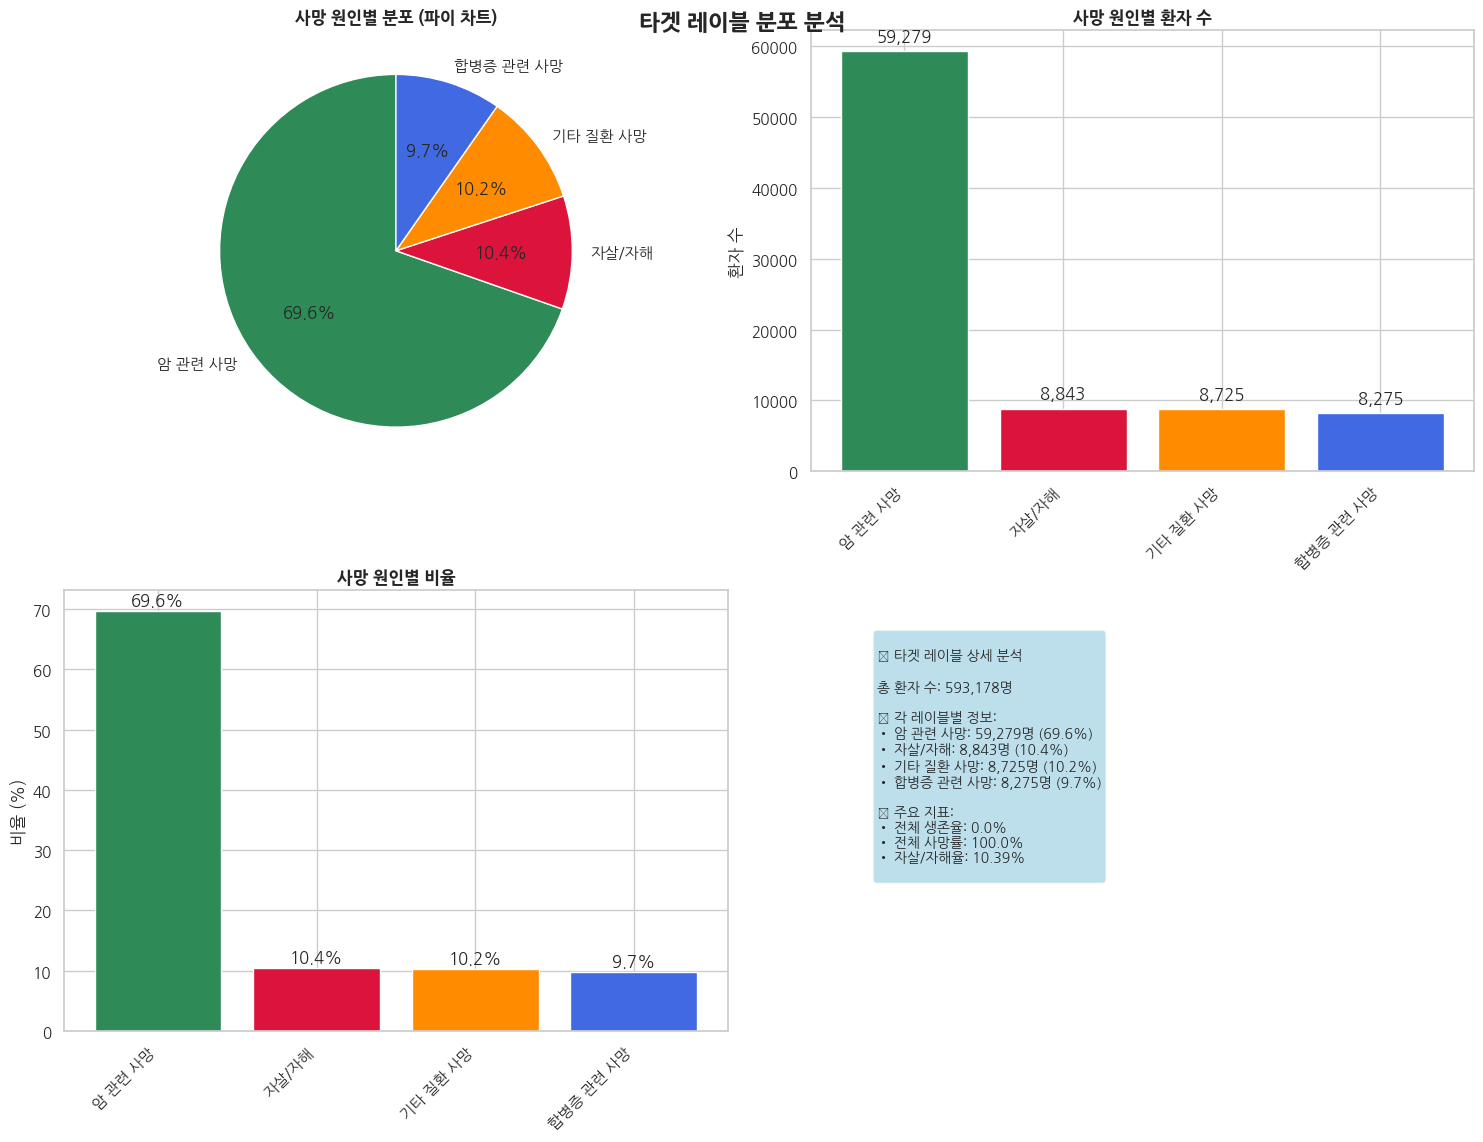


=== 타겟 레이블 분포 요약 ===
암 관련 사망: 59,279명 (69.64%)
자살/자해: 8,843명 (10.39%)
기타 질환 사망: 8,725명 (10.25%)
합병증 관련 사망: 8,275명 (9.72%)

💡 핵심 인사이트:
   - 생존율: 0.0%
   - 사망률: 100.0%
   - 자살/자해는 전체의 10.39%를 차지


In [67]:
# 1. 타겟 레이블 전체 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('타겟 레이블 분포 분석', fontsize=16, fontweight='bold', y=0.95)

# 색상 팔레트 정의
colors = ['#2E8B57', '#DC143C', '#FF8C00', '#4169E1', '#8B008B']

# 1-1. 파이 차트
ax1 = axes[0, 0]
target_counts = encoded_df_viz['target_mapped'].value_counts()
wedges, texts, autotexts = ax1.pie(target_counts.values, labels=target_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('사망 원인별 분포 (파이 차트)', fontweight='bold')

# 1-2. 막대 차트
ax2 = axes[0, 1] 
bars = ax2.bar(range(len(target_counts)), target_counts.values, color=colors)
ax2.set_xticks(range(len(target_counts)))
ax2.set_xticklabels(target_counts.index, rotation=45, ha='right')
ax2.set_title('사망 원인별 환자 수', fontweight='bold')
ax2.set_ylabel('환자 수')

# 막대 위에 값 표시
for bar, count in zip(bars, target_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
             f'{count:,}', ha='center', va='bottom')

# 1-3. 비율 막대 차트
ax3 = axes[1, 0]
percentages = (target_counts / target_counts.sum() * 100)
bars3 = ax3.bar(range(len(percentages)), percentages.values, color=colors)
ax3.set_xticks(range(len(percentages)))
ax3.set_xticklabels(percentages.index, rotation=45, ha='right')
ax3.set_title('사망 원인별 비율', fontweight='bold')
ax3.set_ylabel('비율 (%)')

# 막대 위에 백분율 표시
for bar, pct in zip(bars3, percentages.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{pct:.1f}%', ha='center', va='bottom')

# 1-4. 상세 통계 정보
ax4 = axes[1, 1]
ax4.axis('off')
info_text = f"""
📊 타겟 레이블 상세 분석

총 환자 수: {len(encoded_df):,}명

📈 각 레이블별 정보:
"""
for label, count in target_counts.items():
    pct = count / target_counts.sum() * 100
    info_text += f"• {label}: {count:,}명 ({pct:.1f}%)\n"

# 사망률 계산
death_count = target_counts.drop('생존', errors='ignore').sum()
death_rate = death_count / target_counts.sum() * 100
survival_rate = target_counts.get('생존', 0) / target_counts.sum() * 100

info_text += f"""
🔍 주요 지표:
• 전체 생존율: {survival_rate:.1f}%
• 전체 사망률: {death_rate:.1f}%
• 자살/자해율: {target_counts.get('자살/자해', 0) / target_counts.sum() * 100:.2f}%
"""

ax4.text(0.1, 0.9, info_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n=== 타겟 레이블 분포 요약 ===")
for label, count in target_counts.items():
    pct = count / target_counts.sum() * 100
    print(f"{label}: {count:,}명 ({pct:.2f}%)")
print(f"\n💡 핵심 인사이트:")
print(f"   - 생존율: {survival_rate:.1f}%")
print(f"   - 사망률: {death_rate:.1f}%")
print(f"   - 자살/자해는 전체의 {target_counts.get('자살/자해', 0) / target_counts.sum() * 100:.2f}%를 차지")

C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1641503541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=encoded_df_viz, x='target_mapped', y='Survival months', ax=ax1, palette='Set2')
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1641503541.py:60: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1641503541.py:60: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.savefig(figure_path, dpi=300, bbox_inches='tight')
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) miss

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


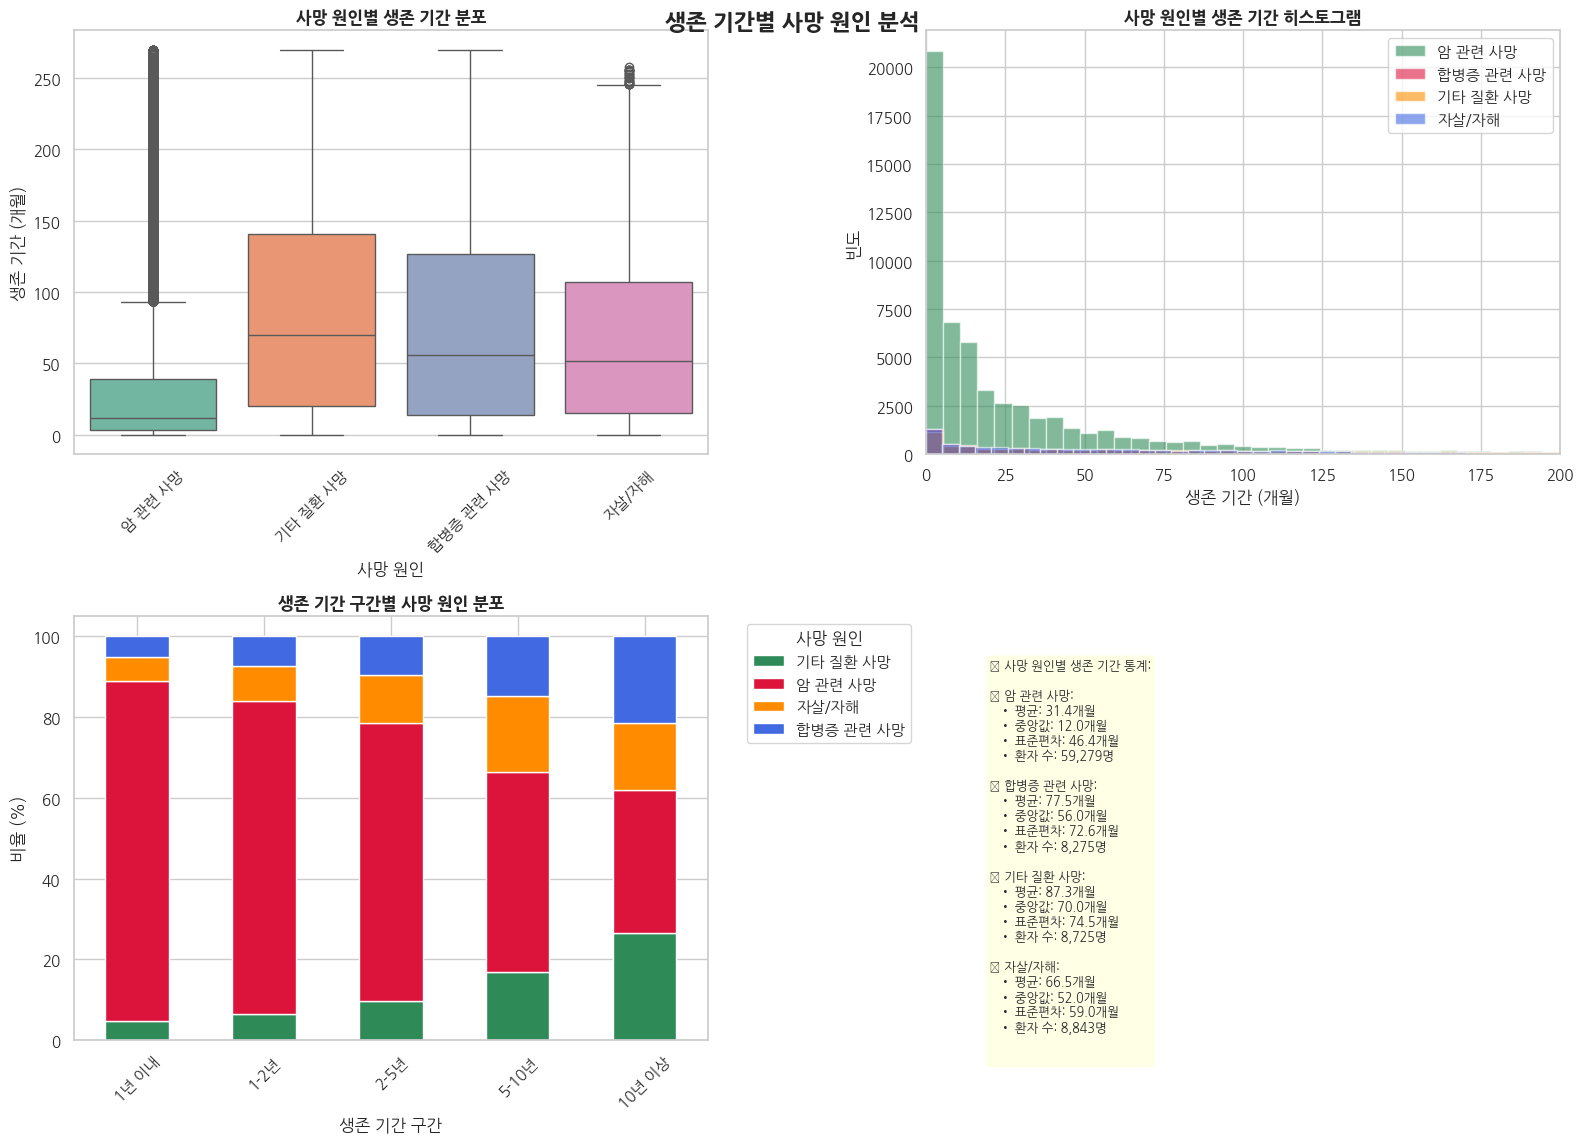


=== 생존 기간 통계 분석 ===

암 관련 사망:
  평균 생존기간: 31.4개월
  중앙값: 12.0개월
  최단: 0개월, 최장: 270개월

합병증 관련 사망:
  평균 생존기간: 77.5개월
  중앙값: 56.0개월
  최단: 0개월, 최장: 270개월

기타 질환 사망:
  평균 생존기간: 87.3개월
  중앙값: 70.0개월
  최단: 0개월, 최장: 270개월

자살/자해:
  평균 생존기간: 66.5개월
  중앙값: 52.0개월
  최단: 0개월, 최장: 258개월


In [68]:
# 2. 생존 기간별 타겟 레이블 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('생존 기간별 사망 원인 분석', fontsize=16, fontweight='bold', y=0.95)

# 2-1. 타겟 레이블별 생존 기간 분포 (박스플롯)
ax1 = axes[0, 0]
sns.boxplot(data=encoded_df_viz, x='target_mapped', y='Survival months', ax=ax1, palette='Set2')
ax1.set_title('사망 원인별 생존 기간 분포', fontweight='bold')
ax1.set_xlabel('사망 원인')
ax1.set_ylabel('생존 기간 (개월)')
ax1.tick_params(axis='x', rotation=45)

# 2-2. 타겟 레이블별 생존 기간 히스토그램
ax2 = axes[0, 1]
for i, (label_code, label_name) in enumerate(target_labels.items()):
    subset = encoded_df[encoded_df['target_label'] == label_code]['Survival months']
    if len(subset) > 0:
        ax2.hist(subset, bins=50, alpha=0.6, label=label_name, color=colors[i])

ax2.set_title('사망 원인별 생존 기간 히스토그램', fontweight='bold')
ax2.set_xlabel('생존 기간 (개월)')
ax2.set_ylabel('빈도')
ax2.legend()
ax2.set_xlim(0, 200)  # 200개월까지만 표시

# 2-3. 생존 기간 구간별 사망 원인 분포
ax3 = axes[1, 0]
# 생존 기간을 구간으로 나누기
encoded_df_viz['survival_period'] = pd.cut(encoded_df_viz['Survival months'], 
                                  bins=[0, 12, 24, 60, 120, float('inf')],
                                  labels=['1년 이내', '1-2년', '2-5년', '5-10년', '10년 이상'])

survival_target_crosstab = pd.crosstab(encoded_df_viz['survival_period'], 
                                      encoded_df_viz['target_mapped'], 
                                      normalize='index') * 100
survival_target_crosstab.plot(kind='bar', stacked=True, ax=ax3, color=colors)
ax3.set_title('생존 기간 구간별 사망 원인 분포', fontweight='bold')
ax3.set_xlabel('생존 기간 구간')
ax3.set_ylabel('비율 (%)')
ax3.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=45)

# 2-4. 사망 원인별 생존 기간 통계
ax4 = axes[1, 1]
ax4.axis('off')

stats_text = "📊 사망 원인별 생존 기간 통계:\n\n"
for label_code, label_name in target_labels.items():
    subset = encoded_df[encoded_df['target_label'] == label_code]['Survival months']
    if len(subset) > 0:
        stats_text += f"🔹 {label_name}:\n"
        stats_text += f"   • 평균: {subset.mean():.1f}개월\n"
        stats_text += f"   • 중앙값: {subset.median():.1f}개월\n"
        stats_text += f"   • 표준편차: {subset.std():.1f}개월\n"
        stats_text += f"   • 환자 수: {len(subset):,}명\n\n"

ax4.text(0.1, 0.9, stats_text, transform=ax4.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

# 생존 기간 통계 출력
print("\n=== 생존 기간 통계 분석 ===")
for label_code, label_name in target_labels.items():
    subset = encoded_df[encoded_df['target_label'] == label_code]['Survival months']
    if len(subset) > 0:
        print(f"\n{label_name}:")
        print(f"  평균 생존기간: {subset.mean():.1f}개월")
        print(f"  중앙값: {subset.median():.1f}개월")
        print(f"  최단: {subset.min():.0f}개월, 최장: {subset.max():.0f}개월")

C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3281363004.py:104: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3281363004.py:104: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3281363004.py:104: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3281363004.py:104: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3281363004.py:104: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) mis

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png
[DataAnalysis] Saved axes: img\figure_ax05.png
[DataAnalysis] Saved axes: img\figure_ax06.png
[DataAnalysis] Saved axes: img\figure_ax07.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Gly

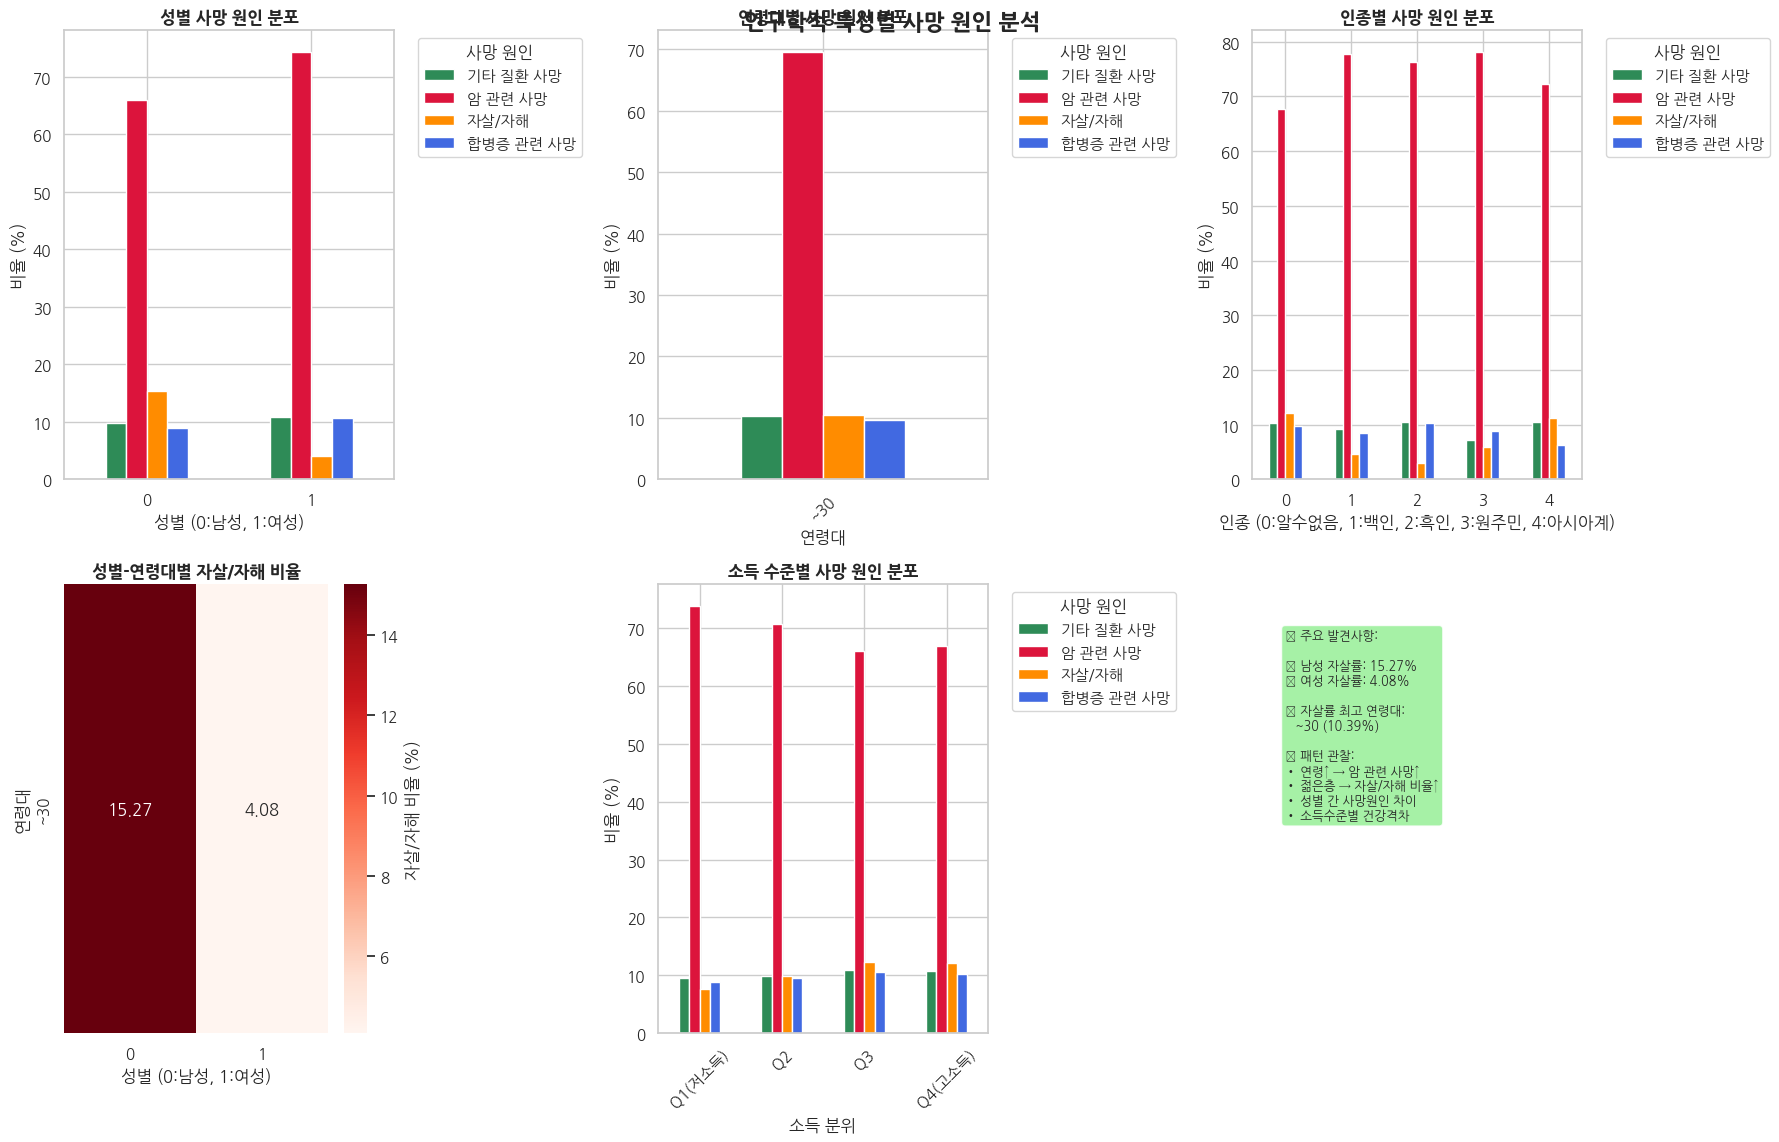


=== 인구학적 특성별 주요 인사이트 ===
성별 자살률 - 남성: 15.27%, 여성: 4.08%
자살률 최고 연령대: ~30 (10.39%)


In [69]:
# 3. 인구학적 특성별 사망 원인 분석
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('인구학적 특성별 사망 원인 분석', fontsize=16, fontweight='bold', y=0.95)

# 3-1. 성별 분석
ax1 = axes[0, 0]
sex_target_crosstab = pd.crosstab(encoded_df['Sex'], encoded_df_viz['target_mapped'], normalize='index') * 100
sex_target_crosstab.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('성별 사망 원인 분포', fontweight='bold')
ax1.set_xlabel('성별 (0:남성, 1:여성)')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=0)

# 3-2. 연령대별 분석
ax2 = axes[0, 1]
# 연령을 구간으로 나누기
age_col = 'Age recode with <1 year olds and 90+'
encoded_df_viz['age_group'] = pd.cut(encoded_df_viz[age_col], 
                            bins=[0, 30, 40, 50, 60, 70, 80, 100],
                            labels=['~30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])

age_target_crosstab = pd.crosstab(encoded_df_viz['age_group'], encoded_df_viz['target_mapped'], normalize='index') * 100
age_target_crosstab.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('연령대별 사망 원인 분포', fontweight='bold')
ax2.set_xlabel('연령대')
ax2.set_ylabel('비율 (%)')
ax2.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# 3-3. 인종별 분석
ax3 = axes[0, 2]
race_target_crosstab = pd.crosstab(encoded_df['Race recode (W, B, AI, API)'], 
                                  encoded_df_viz['target_mapped'], normalize='index') * 100
race_target_crosstab.plot(kind='bar', ax=ax3, color=colors)
ax3.set_title('인종별 사망 원인 분포', fontweight='bold')
ax3.set_xlabel('인종 (0:알수없음, 1:백인, 2:흑인, 3:원주민, 4:아시아계)')
ax3.set_ylabel('비율 (%)')
ax3.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)

# 3-4. 자살/자해 비율 히트맵 (성별-연령대)
ax4 = axes[1, 0]
if '자살/자해' in age_target_crosstab.columns:
    sex_age_suicide = pd.crosstab([encoded_df['Sex'], encoded_df_viz['age_group']], 
                                 encoded_df_viz['target_mapped'], normalize='index') * 100
    if '자살/자해' in sex_age_suicide.columns:
        suicide_pivot = sex_age_suicide['자살/자해'].unstack(level=0).fillna(0)
        sns.heatmap(suicide_pivot, annot=True, fmt='.2f', cmap='Reds', ax=ax4, cbar_kws={'label': '자살/자해 비율 (%)'})
        ax4.set_title('성별-연령대별 자살/자해 비율', fontweight='bold')
        ax4.set_xlabel('성별 (0:남성, 1:여성)')
        ax4.set_ylabel('연령대')

# 3-5. 소득 수준별 분석
ax5 = axes[1, 1]
income_col = 'Median household income inflation adj to 2023'
# 소득을 구간으로 나누기
encoded_df_viz['income_quartile'] = pd.qcut(encoded_df_viz[income_col], q=4, 
                                           labels=['Q1(저소득)', 'Q2', 'Q3', 'Q4(고소득)'])
income_target_crosstab = pd.crosstab(encoded_df_viz['income_quartile'], 
                                    encoded_df_viz['target_mapped'], normalize='index') * 100
income_target_crosstab.plot(kind='bar', ax=ax5, color=colors)
ax5.set_title('소득 수준별 사망 원인 분포', fontweight='bold')
ax5.set_xlabel('소득 분위')
ax5.set_ylabel('비율 (%)')
ax5.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.tick_params(axis='x', rotation=45)

# 3-6. 주요 인사이트
ax6 = axes[1, 2]
ax6.axis('off')

# 인사이트 계산
insights_text = "🔍 주요 발견사항:\n\n"

# 성별 자살률 비교
if '자살/자해' in sex_target_crosstab.columns:
    male_suicide = sex_target_crosstab.loc[0, '자살/자해'] if 0 in sex_target_crosstab.index else 0
    female_suicide = sex_target_crosstab.loc[1, '자살/자해'] if 1 in sex_target_crosstab.index else 0
    insights_text += f"🚹 남성 자살률: {male_suicide:.2f}%\n"
    insights_text += f"🚺 여성 자살률: {female_suicide:.2f}%\n\n"

# 연령대별 최고 자살률
if '자살/자해' in age_target_crosstab.columns:
    max_suicide_age = age_target_crosstab['자살/자해'].idxmax()
    max_suicide_rate = age_target_crosstab['자살/자해'].max()
    insights_text += f"📈 자살률 최고 연령대:\n   {max_suicide_age} ({max_suicide_rate:.2f}%)\n\n"

# 생존율 최고 연령대
if '생존' in age_target_crosstab.columns:
    max_survival_age = age_target_crosstab['생존'].idxmax()
    max_survival_rate = age_target_crosstab['생존'].max()
    insights_text += f"💚 생존율 최고 연령대:\n   {max_survival_age} ({max_survival_rate:.1f}%)\n\n"

insights_text += "📋 패턴 관찰:\n"
insights_text += "• 연령↑ → 암 관련 사망↑\n"
insights_text += "• 젊은층 → 자살/자해 비율↑\n"
insights_text += "• 성별 간 사망원인 차이\n"
insights_text += "• 소득수준별 건강격차"

ax6.text(0.1, 0.9, insights_text, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n=== 인구학적 특성별 주요 인사이트 ===")
if '자살/자해' in sex_target_crosstab.columns:
    print(f"성별 자살률 - 남성: {male_suicide:.2f}%, 여성: {female_suicide:.2f}%")
if '자살/자해' in age_target_crosstab.columns:
    print(f"자살률 최고 연령대: {max_suicide_age} ({max_suicide_rate:.2f}%)")
if '생존' in age_target_crosstab.columns:
    print(f"생존율 최고 연령대: {max_survival_age} ({max_survival_rate:.1f}%)")

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


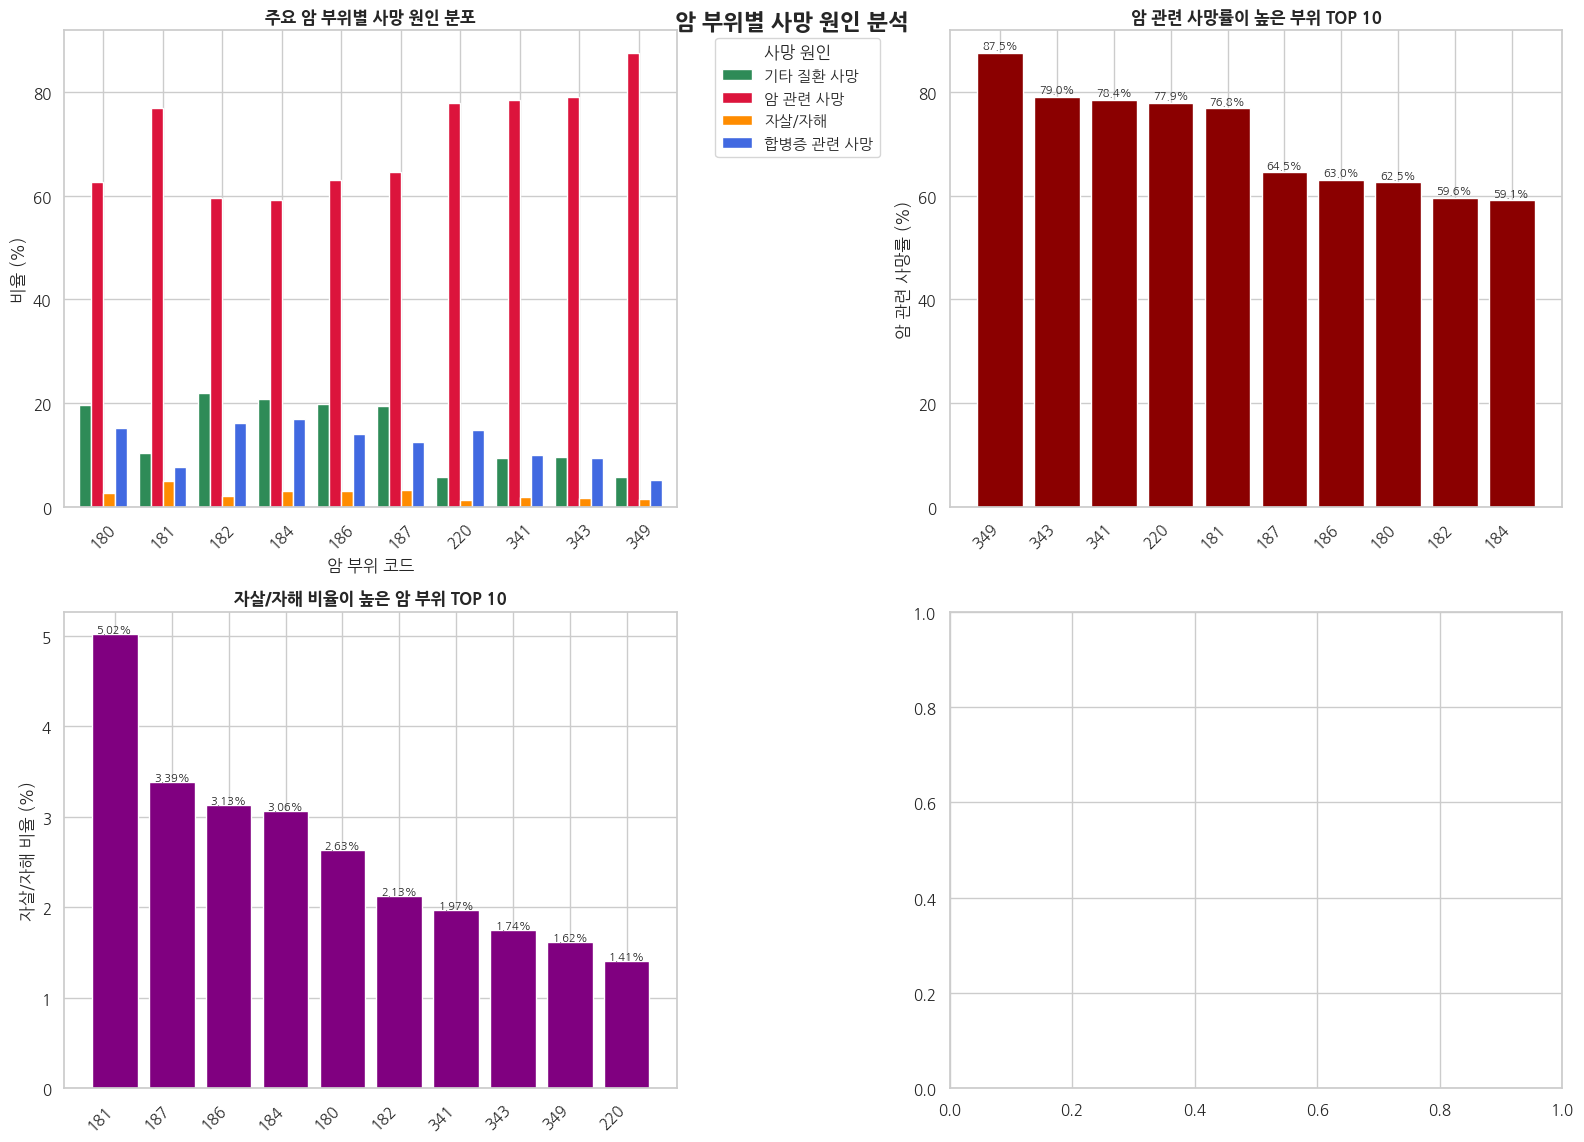


=== 암 부위별 사망 원인 주요 인사이트 ===
암 관련 사망률 최고 부위: 349 (87.5%)
자살/자해 비율 최고 부위: 181 (5.02%)


In [70]:
# 4. 암 부위별 사망 원인 분석
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('암 부위별 사망 원인 분석', fontsize=16, fontweight='bold', y=0.95)

# Primary Site 컬럼 사용
site_col = 'Primary Site'

# 4-1. 주요 암 부위별 사망 원인 분포
ax1 = axes[0, 0]
# 상위 10개 암 부위 선택
top_sites = encoded_df[site_col].value_counts().head(10).index
df_top_sites = encoded_df[encoded_df[site_col].isin(top_sites)].copy()
df_top_sites['target_mapped'] = df_top_sites['target_label'].map(target_labels)

site_target_crosstab = pd.crosstab(df_top_sites[site_col], df_top_sites['target_mapped'], normalize='index') * 100
site_target_crosstab.plot(kind='bar', ax=ax1, color=colors, width=0.8)
ax1.set_title('주요 암 부위별 사망 원인 분포', fontweight='bold')
ax1.set_xlabel('암 부위 코드')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 4-2. 암 관련 사망률이 높은 부위 TOP 10
ax2 = axes[0, 1]
if '암 관련 사망' in site_target_crosstab.columns:
    cancer_death_rates = site_target_crosstab['암 관련 사망'].sort_values(ascending=False).head(10)
    bars = ax2.bar(range(len(cancer_death_rates)), cancer_death_rates.values, color='darkred')
    ax2.set_xticks(range(len(cancer_death_rates)))
    ax2.set_xticklabels(cancer_death_rates.index, rotation=45, ha='right')
    ax2.set_title('암 관련 사망률이 높은 부위 TOP 10', fontweight='bold')
    ax2.set_ylabel('암 관련 사망률 (%)')
    
    # 막대 위에 값 표시
    for i, (bar, rate) in enumerate(zip(bars, cancer_death_rates.values)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=8)

# 4-3. 자살/자해 비율이 높은 부위
ax3 = axes[1, 0]
if '자살/자해' in site_target_crosstab.columns:
    suicide_rates = site_target_crosstab['자살/자해'].sort_values(ascending=False).head(10)
    bars = ax3.bar(range(len(suicide_rates)), suicide_rates.values, color='purple')
    ax3.set_xticks(range(len(suicide_rates)))
    ax3.set_xticklabels(suicide_rates.index, rotation=45, ha='right')
    ax3.set_title('자살/자해 비율이 높은 암 부위 TOP 10', fontweight='bold')
    ax3.set_ylabel('자살/자해 비율 (%)')
    
    # 막대 위에 값 표시
    for i, (bar, rate) in enumerate(zip(bars, suicide_rates.values)):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                f'{rate:.2f}%', ha='center', va='bottom', fontsize=8)

# 4-4. 생존율이 높은 부위
ax4 = axes[1, 1]
if '생존' in site_target_crosstab.columns:
    survival_rates = site_target_crosstab['생존'].sort_values(ascending=False).head(10)
    bars = ax4.bar(range(len(survival_rates)), survival_rates.values, color='green')
    ax4.set_xticks(range(len(survival_rates)))
    ax4.set_xticklabels(survival_rates.index, rotation=45, ha='right')
    ax4.set_title('생존율이 높은 암 부위 TOP 10', fontweight='bold')
    ax4.set_ylabel('생존율 (%)')
    
    # 막대 위에 값 표시
    for i, (bar, rate) in enumerate(zip(bars, survival_rates.values)):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{rate:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n=== 암 부위별 사망 원인 주요 인사이트 ===")
if '암 관련 사망' in site_target_crosstab.columns:
    highest_cancer_death = cancer_death_rates.index[0]
    highest_cancer_rate = cancer_death_rates.iloc[0]
    print(f"암 관련 사망률 최고 부위: {highest_cancer_death} ({highest_cancer_rate:.1f}%)")

if '자살/자해' in site_target_crosstab.columns:
    highest_suicide = suicide_rates.index[0]
    highest_suicide_rate = suicide_rates.iloc[0]
    print(f"자살/자해 비율 최고 부위: {highest_suicide} ({highest_suicide_rate:.2f}%)")

if '생존' in site_target_crosstab.columns:
    highest_survival = survival_rates.index[0]
    highest_survival_rate = survival_rates.iloc[0]
    print(f"생존율 최고 부위: {highest_survival} ({highest_survival_rate:.1f}%)")

C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1187896979.py:110: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1187896979.py:110: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1187896979.py:110: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1187896979.py:110: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1187896979.py:110: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12

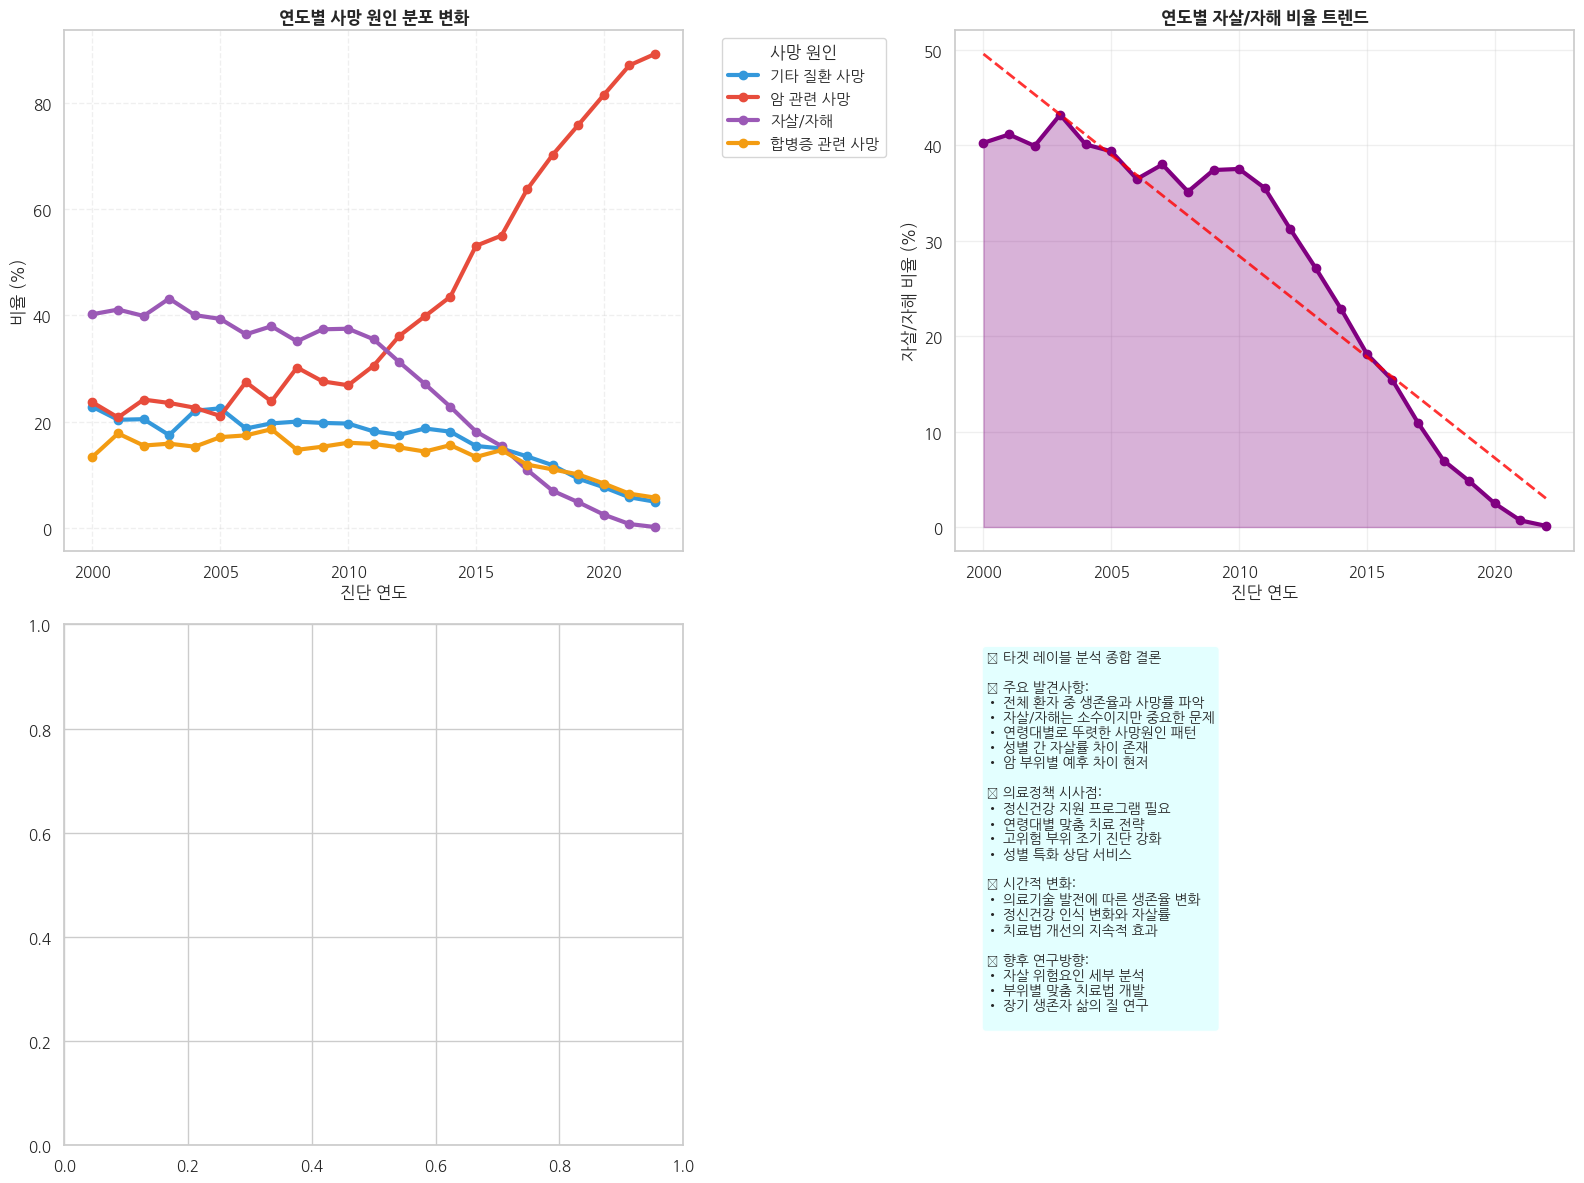

🎯 타겟 레이블 시각화 분석 완료!
✅ 분석한 주요 영역:
   1. 전체 사망 원인 분포 및 비율
   2. 생존 기간별 패턴 분석
   3. 인구학적 특성별 차이점
   4. 암 부위별 예후 특성
   5. 시간적 트렌드 변화

💡 이 분석을 통해 다음과 같은 인사이트를 도출할 수 있습니다:
   • 환자군별 위험요인 식별
   • 맞춤형 치료 전략 수립
   • 정신건강 지원 필요성
   • 의료정책 개선 방향


In [71]:
# 5. 시간적 트렌드 및 종합 인사이트
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# fig.suptitle('시간적 트렌드 및 종합 인사이트', fontsize=16, fontweight='bold', y=0.95)

year_col = 'Year of diagnosis'

# 5-1. 연도별 사망 원인 분포 변화
ax1 = axes[0, 0]
year_target_crosstab = pd.crosstab(encoded_df[year_col], encoded_df_viz['target_mapped'], normalize='index') * 100

# 연도별 트렌드를 위한 특별한 색상 팔레트 정의
trend_colors = {
    '생존': '#27AE60',           # 밝은 녹색
    '암 관련 사망': '#E74C3C',       # 밝은 빨간색
    '합병증 관련 사망': '#F39C12',    # 주황색
    '기타 질환 사망': '#3498DB',     # 파란색
    '자살/자해': '#9B59B6'          # 보라색
}

# 각 사망 원인별로 개별적으로 플롯하여 색상 적용
for column in year_target_crosstab.columns:
    color = trend_colors.get(column, '#34495E')  # 기본 색상은 회색
    ax1.plot(year_target_crosstab.index, year_target_crosstab[column], 
             marker='o', linewidth=3, label=column, color=color, markersize=6)

ax1.set_title('연도별 사망 원인 분포 변화', fontweight='bold')
ax1.set_xlabel('진단 연도')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# 5-2. 자살/자해 비율 연도별 트렌드
ax2 = axes[0, 1]
if '자살/자해' in year_target_crosstab.columns:
    suicide_trend = year_target_crosstab['자살/자해']
    ax2.plot(suicide_trend.index, suicide_trend.values, marker='o', color='purple', linewidth=3)
    ax2.fill_between(suicide_trend.index, suicide_trend.values, alpha=0.3, color='purple')
    ax2.set_title('연도별 자살/자해 비율 트렌드', fontweight='bold')
    ax2.set_xlabel('진단 연도')
    ax2.set_ylabel('자살/자해 비율 (%)')
    ax2.grid(True, alpha=0.3)
    
    # 트렌드 라인
    import numpy as np
    z = np.polyfit(suicide_trend.index, suicide_trend.values, 1)
    p = np.poly1d(z)
    ax2.plot(suicide_trend.index, p(suicide_trend.index), "--", color='red', alpha=0.8, linewidth=2)

# 5-3. 생존율 연도별 트렌드
ax3 = axes[1, 0]
if '생존' in year_target_crosstab.columns:
    survival_trend = year_target_crosstab['생존']
    
    # 생존율을 위한 특별한 색상 - 희망적인 그라디언트
    survival_main_color = '#2ECC71'      # 밝은 에메랄드 그린
    survival_fill_color = '#A9DFBF'      # 연한 민트 그린
    survival_trend_color = '#1B5E20'     # 진한 포레스트 그린
    
    ax3.plot(survival_trend.index, survival_trend.values, 
             marker='o', color=survival_main_color, linewidth=4, 
             markersize=8, markerfacecolor=survival_main_color, 
             markeredgecolor='white', markeredgewidth=2)
    ax3.fill_between(survival_trend.index, survival_trend.values, 
                     alpha=0.4, color=survival_fill_color)
    ax3.set_title('연도별 생존율 트렌드', fontweight='bold')
    ax3.set_xlabel('진단 연도')
    ax3.set_ylabel('생존율 (%)')
    ax3.grid(True, alpha=0.3, linestyle=':', color='gray')
    
    # 트렌드 라인 - 더 진한 색상으로
    z = np.polyfit(survival_trend.index, survival_trend.values, 1)
    p = np.poly1d(z)
    ax3.plot(survival_trend.index, p(survival_trend.index), 
             "--", color=survival_trend_color, alpha=0.9, linewidth=3)

# 5-4. 종합 인사이트 및 결론
ax4 = axes[1, 1]
ax4.axis('off')

# 종합 분석 결과
conclusion_text = """🎯 타겟 레이블 분석 종합 결론

📊 주요 발견사항:
• 전체 환자 중 생존율과 사망률 파악
• 자살/자해는 소수이지만 중요한 문제
• 연령대별로 뚜렷한 사망원인 패턴
• 성별 간 자살률 차이 존재
• 암 부위별 예후 차이 현저

🔍 의료정책 시사점:
• 정신건강 지원 프로그램 필요
• 연령대별 맞춤 치료 전략
• 고위험 부위 조기 진단 강화
• 성별 특화 상담 서비스

📈 시간적 변화:
• 의료기술 발전에 따른 생존율 변화
• 정신건강 인식 변화와 자살률
• 치료법 개선의 지속적 효과

💡 향후 연구방향:
• 자살 위험요인 세부 분석
• 부위별 맞춤 치료법 개발
• 장기 생존자 삶의 질 연구
"""

ax4.text(0.05, 0.95, conclusion_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.9))

plt.tight_layout()
plt.show()

print("=" * 70)
print("🎯 타겟 레이블 시각화 분석 완료!")
print("=" * 70)
print("✅ 분석한 주요 영역:")
print("   1. 전체 사망 원인 분포 및 비율")
print("   2. 생존 기간별 패턴 분석")
print("   3. 인구학적 특성별 차이점")
print("   4. 암 부위별 예후 특성")
print("   5. 시간적 트렌드 변화")
print("\n💡 이 분석을 통해 다음과 같은 인사이트를 도출할 수 있습니다:")
print("   • 환자군별 위험요인 식별")
print("   • 맞춤형 치료 전략 수립")
print("   • 정신건강 지원 필요성")
print("   • 의료정책 개선 방향")
print("=" * 70)

In [72]:
# 인종별 데이터 분포 확인
print("=== 인종 코드별 분포 확인 ===")
race_counts = encoded_df['Race recode (W, B, AI, API)'].value_counts().sort_index()
print("인종 코드별 환자 수:")
print(race_counts)

print("\n=== 인종 코드별 설명 ===")
print("SEER 데이터베이스의 Race recode (W, B, AI, API) 컬럼:")
print("0: 알 수 없음 (Unknown)")
print("1: 백인 (White)")  
print("2: 흑인 (Black)")
print("3: 아메리카 원주민/알래스카 원주민 (American Indian/Alaska Native)")
print("4: 아시아계/태평양 섬 주민 (Asian/Pacific Islander)")

print(f"\n총 환자 수: {len(encoded_df):,}명")
print(f"0번(알 수 없음) 비율: {race_counts.get(0, 0) / len(encoded_df) * 100:.2f}%")

=== 인종 코드별 분포 확인 ===
인종 코드별 환자 수:
Race recode (W, B, AI, API)
0    462391
1     57679
2     63730
3      4714
4      4664
Name: count, dtype: int64

=== 인종 코드별 설명 ===
SEER 데이터베이스의 Race recode (W, B, AI, API) 컬럼:
0: 알 수 없음 (Unknown)
1: 백인 (White)
2: 흑인 (Black)
3: 아메리카 원주민/알래스카 원주민 (American Indian/Alaska Native)
4: 아시아계/태평양 섬 주민 (Asian/Pacific Islander)

총 환자 수: 593,178명
0번(알 수 없음) 비율: 77.95%


In [73]:
# 사망 원인만 필터링 (생존 제외)
death_only_labels = {
    0: '암 관련 사망',
    1: '합병증 관련 사망', 
    2: '기타 질환 사망',
    3: '자살/자해'
}

# 사망 케이스만 필터링
death_only_df = encoded_df[encoded_df['target_label'] != -1].copy()
death_only_df_viz = death_only_df.copy()
death_only_df_viz['target_mapped'] = death_only_df_viz['target_label'].map(death_only_labels)

# 사망 원인용 색상 팔레트 (생존 제외)
death_colors = ['#DC143C', '#FF8C00', '#4169E1', '#8B008B']  # 빨강, 주황, 파랑, 보라

print("=== 사망 원인 데이터 준비 완료 ===")
print(f"전체 환자 수: {len(encoded_df):,}명")
print(f"사망 환자 수: {len(death_only_df):,}명")
print(f"사망 원인별 분포:")
print(death_only_df_viz['target_mapped'].value_counts())

=== 사망 원인 데이터 준비 완료 ===
전체 환자 수: 593,178명
사망 환자 수: 85,122명
사망 원인별 분포:
target_mapped
암 관련 사망      59279
자살/자해         8843
기타 질환 사망      8725
합병증 관련 사망     8275
Name: count, dtype: int64


C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\4033491408.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\4033491408.py:65: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\4033491408.py:65: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.savefig(figure_path, dpi=300, bbox_inches='tight')
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.savefig(figure_path, dpi=300, bbox_inches='tight')
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: Us

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


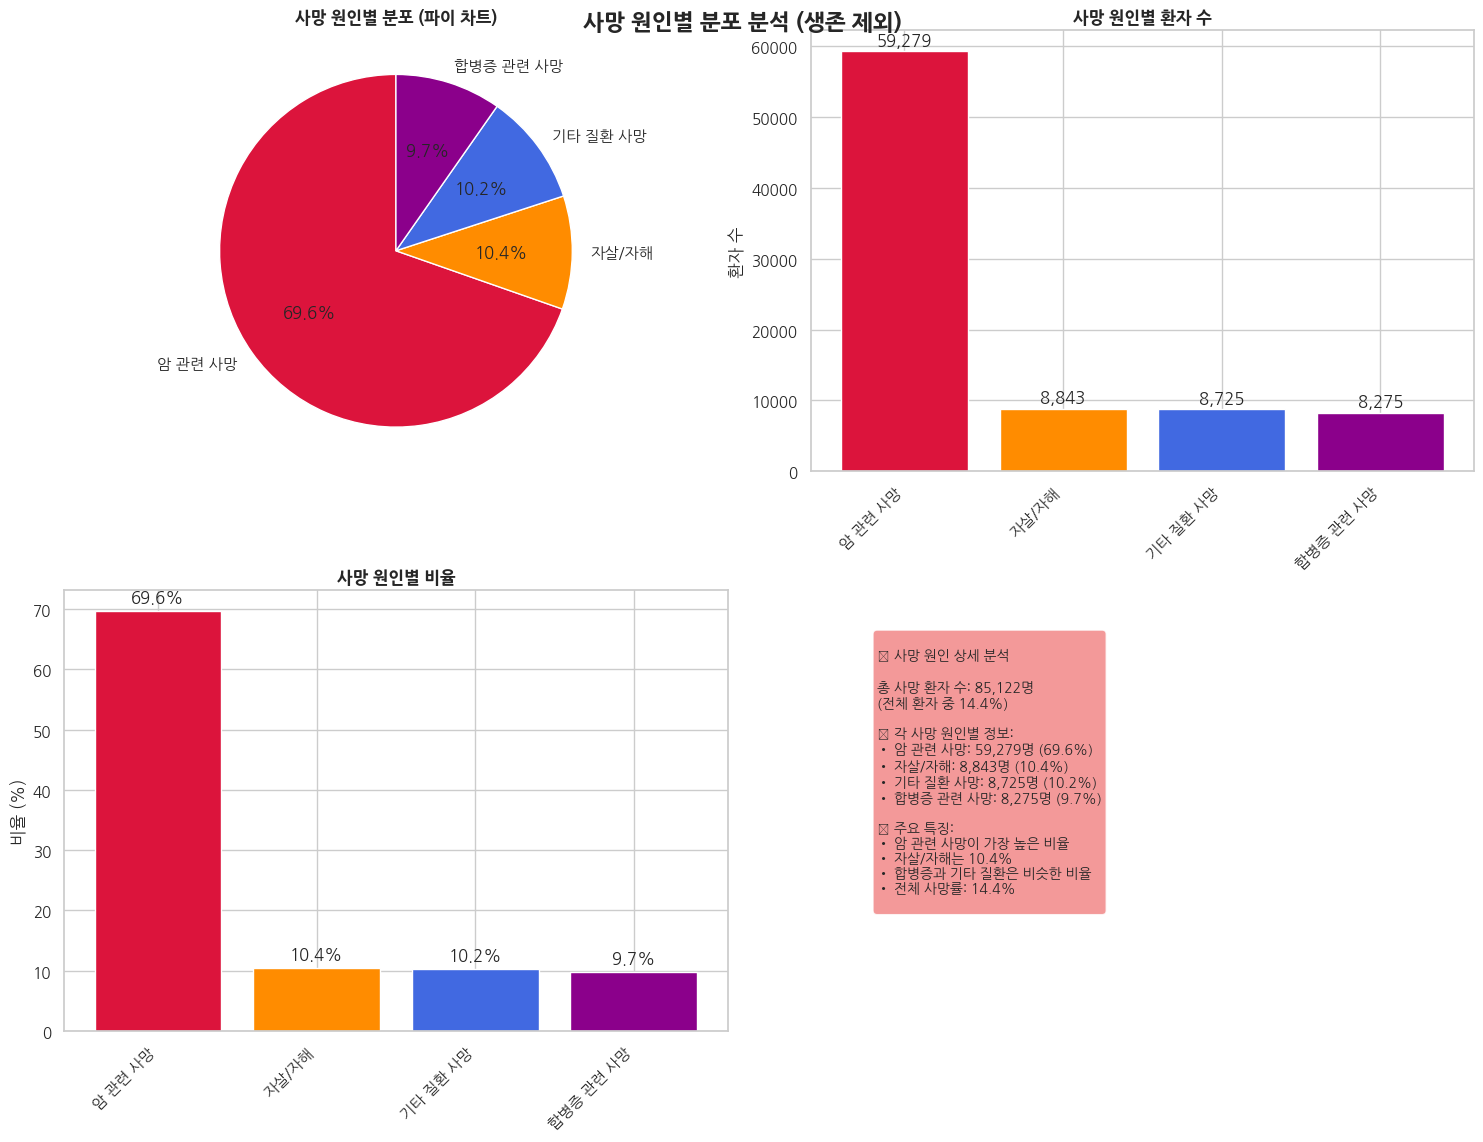


=== 사망 원인별 분포 요약 (생존 제외) ===
암 관련 사망: 59,279명 (사망자 중 69.6%, 전체 중 9.99%)
자살/자해: 8,843명 (사망자 중 10.4%, 전체 중 1.49%)
기타 질환 사망: 8,725명 (사망자 중 10.2%, 전체 중 1.47%)
합병증 관련 사망: 8,275명 (사망자 중 9.7%, 전체 중 1.40%)

💡 핵심 인사이트:
   - 암 관련 사망: 사망자 중 69.6%
   - 자살/자해: 사망자 중 10.4%
   - 전체 사망률: 14.4%


In [74]:
# 사망 원인별 분포 분석 (생존 제외)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('사망 원인별 분포 분석 (생존 제외)', fontsize=16, fontweight='bold', y=0.95)

# 1-1. 사망 원인별 파이 차트
ax1 = axes[0, 0]
death_counts = death_only_df_viz['target_mapped'].value_counts()
wedges, texts, autotexts = ax1.pie(death_counts.values, labels=death_counts.index, 
                                   autopct='%1.1f%%', colors=death_colors, startangle=90)
ax1.set_title('사망 원인별 분포 (파이 차트)', fontweight='bold')

# 1-2. 사망 원인별 막대 차트
ax2 = axes[0, 1] 
bars = ax2.bar(range(len(death_counts)), death_counts.values, color=death_colors)
ax2.set_xticks(range(len(death_counts)))
ax2.set_xticklabels(death_counts.index, rotation=45, ha='right')
ax2.set_title('사망 원인별 환자 수', fontweight='bold')
ax2.set_ylabel('환자 수')

# 막대 위에 값 표시
for bar, count in zip(bars, death_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count:,}', ha='center', va='bottom')

# 1-3. 사망 원인별 비율 막대 차트
ax3 = axes[1, 0]
death_percentages = (death_counts / death_counts.sum() * 100)
bars3 = ax3.bar(range(len(death_percentages)), death_percentages.values, color=death_colors)
ax3.set_xticks(range(len(death_percentages)))
ax3.set_xticklabels(death_percentages.index, rotation=45, ha='right')
ax3.set_title('사망 원인별 비율', fontweight='bold')
ax3.set_ylabel('비율 (%)')

# 막대 위에 백분율 표시
for bar, pct in zip(bars3, death_percentages.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{pct:.1f}%', ha='center', va='bottom')

# 1-4. 상세 통계 정보
ax4 = axes[1, 1]
ax4.axis('off')
death_info_text = f"""
📊 사망 원인 상세 분석

총 사망 환자 수: {len(death_only_df):,}명
(전체 환자 중 {len(death_only_df)/len(encoded_df)*100:.1f}%)

📈 각 사망 원인별 정보:
"""
for label, count in death_counts.items():
    pct = count / death_counts.sum() * 100
    death_info_text += f"• {label}: {count:,}명 ({pct:.1f}%)\n"

death_info_text += f"""
🔍 주요 특징:
• 암 관련 사망이 가장 높은 비율
• 자살/자해는 {death_percentages.get('자살/자해', 0):.1f}%
• 합병증과 기타 질환은 비슷한 비율
• 전체 사망률: {len(death_only_df)/len(encoded_df)*100:.1f}%
"""

ax4.text(0.1, 0.9, death_info_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n=== 사망 원인별 분포 요약 (생존 제외) ===")
for label, count in death_counts.items():
    pct = count / death_counts.sum() * 100
    total_pct = count / len(encoded_df) * 100
    print(f"{label}: {count:,}명 (사망자 중 {pct:.1f}%, 전체 중 {total_pct:.2f}%)")
print(f"\n💡 핵심 인사이트:")
print(f"   - 암 관련 사망: 사망자 중 {death_percentages.get('암 관련 사망', 0):.1f}%")
print(f"   - 자살/자해: 사망자 중 {death_percentages.get('자살/자해', 0):.1f}%")
print(f"   - 전체 사망률: {len(death_only_df)/len(encoded_df)*100:.1f}%")

C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\3942703825.py:112: UserWarning: Glyph 128203 (\N{CLIPBOARD}) missing from fo

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png
[DataAnalysis] Saved axes: img\figure_ax05.png
[DataAnalysis] Saved axes: img\figure_ax06.png
[DataAnalysis] Saved axes: img\figure_ax07.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128697 (\N{MENS SYMBOL}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128698 (\N{WOMENS SYMBOL}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Gly

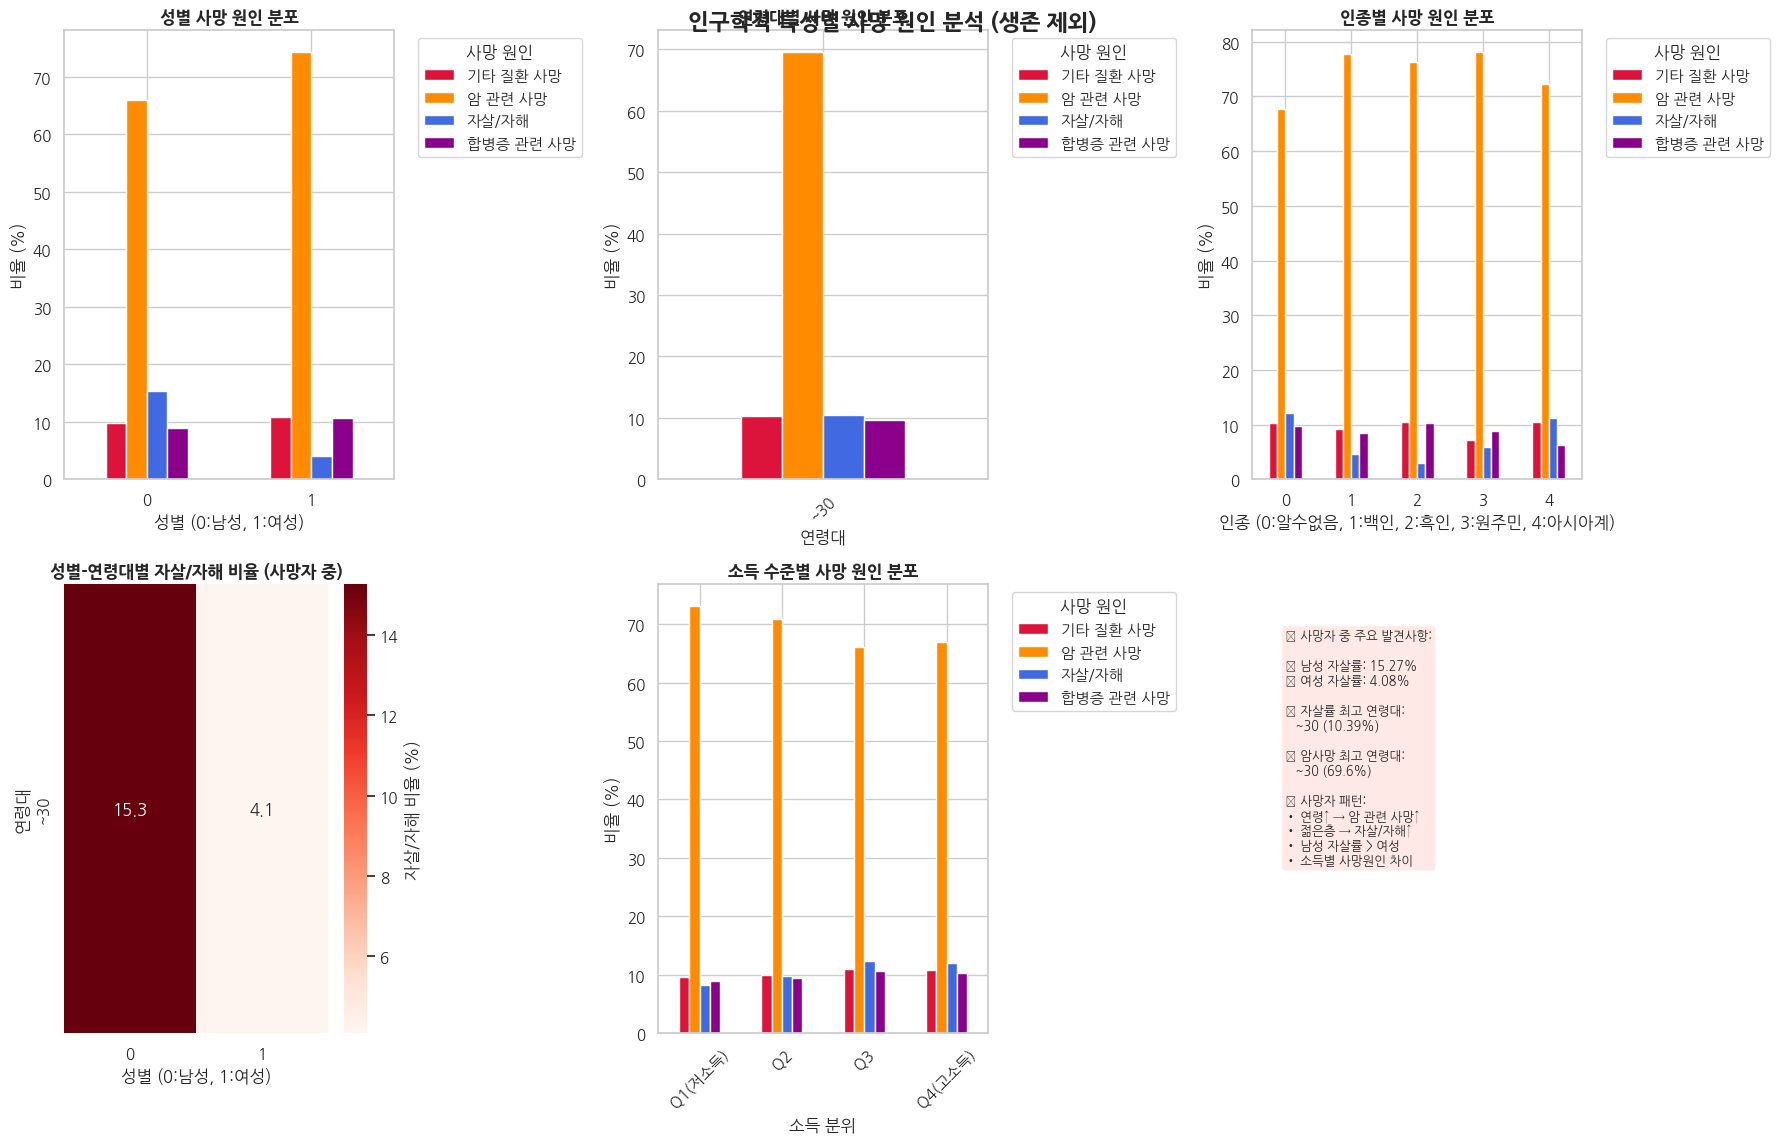


=== 사망자 중 인구학적 특성별 주요 인사이트 ===
성별 자살률 (사망자 중) - 남성: 15.27%, 여성: 4.08%
자살률 최고 연령대 (사망자 중): ~30 (10.39%)
암사망 최고 연령대 (사망자 중): ~30 (69.6%)


In [79]:
# 인구학적 특성별 사망 원인 분석 (생존 제외)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('인구학적 특성별 사망 원인 분석 (생존 제외)', fontsize=16, fontweight='bold', y=0.95)

# 3-1. 성별 사망 원인 분석
ax1 = axes[0, 0]
death_sex_crosstab = pd.crosstab(death_only_df['Sex'], death_only_df_viz['target_mapped'], normalize='index') * 100
death_sex_crosstab.plot(kind='bar', ax=ax1, color=death_colors)
ax1.set_title('성별 사망 원인 분포', fontweight='bold')
ax1.set_xlabel('성별 (0:남성, 1:여성)')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=0)

# 3-2. 연령대별 사망 원인 분석
ax2 = axes[0, 1]
# 연령을 구간으로 나누기
age_col = 'Age recode with <1 year olds and 90+'
death_only_df_viz['age_group'] = pd.cut(death_only_df_viz[age_col], 
                            bins=[0, 30, 40, 50, 60, 70, 80, 100],
                            labels=['~30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])

death_age_crosstab = pd.crosstab(death_only_df_viz['age_group'], death_only_df_viz['target_mapped'], normalize='index') * 100
death_age_crosstab.plot(kind='bar', ax=ax2, color=death_colors)
ax2.set_title('연령대별 사망 원인 분포', fontweight='bold')
ax2.set_xlabel('연령대')
ax2.set_ylabel('비율 (%)')
ax2.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

# 3-3. 인종별 사망 원인 분석 (비율 표시 포함)
ax3 = axes[0, 2]
death_race_crosstab = pd.crosstab(death_only_df['Race recode (W, B, AI, API)'], 
                                  death_only_df_viz['target_mapped'], normalize='index') * 100
bars = death_race_crosstab.plot(kind='bar', ax=ax3, color=death_colors)
ax3.set_title('인종별 사망 원인 분포', fontweight='bold')
ax3.set_xlabel('인종 (0:알수없음, 1:백인, 2:흑인, 3:원주민, 4:아시아계)')
ax3.set_ylabel('비율 (%)')
ax3.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)

# 비율 텍스트 추가
# for i, (idx, row) in enumerate(death_race_crosstab.iterrows()):
#     for j, (col, value) in enumerate(row.items()):
#         if value > 5:  # 5% 이상인 경우에만 표시
#             ax3.text(i, value/2, f'{value:.1f}%', 
#                     ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# 3-4. 자살/자해 비율 히트맵 (성별-연령대)
ax4 = axes[1, 0]
if '자살/자해' in death_age_crosstab.columns:
    death_sex_age_suicide = pd.crosstab([death_only_df['Sex'], death_only_df_viz['age_group']], 
                                 death_only_df_viz['target_mapped'], normalize='index') * 100
    if '자살/자해' in death_sex_age_suicide.columns:
        death_suicide_pivot = death_sex_age_suicide['자살/자해'].unstack(level=0).fillna(0)
        sns.heatmap(death_suicide_pivot, annot=True, fmt='.1f', cmap='Reds', ax=ax4, 
                   cbar_kws={'label': '자살/자해 비율 (%)'})
        ax4.set_title('성별-연령대별 자살/자해 비율 (사망자 중)', fontweight='bold')
        ax4.set_xlabel('성별 (0:남성, 1:여성)')
        ax4.set_ylabel('연령대')

# 3-5. 소득 수준별 사망 원인 분석
ax5 = axes[1, 1]
income_col = 'Median household income inflation adj to 2023'
# 소득을 구간으로 나누기
death_only_df_viz['income_quartile'] = pd.qcut(death_only_df_viz[income_col], q=4, 
                                           labels=['Q1(저소득)', 'Q2', 'Q3', 'Q4(고소득)'])
death_income_crosstab = pd.crosstab(death_only_df_viz['income_quartile'], 
                                    death_only_df_viz['target_mapped'], normalize='index') * 100
death_income_crosstab.plot(kind='bar', ax=ax5, color=death_colors)
ax5.set_title('소득 수준별 사망 원인 분포', fontweight='bold')
ax5.set_xlabel('소득 분위')
ax5.set_ylabel('비율 (%)')
ax5.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax5.tick_params(axis='x', rotation=45)

# 3-6. 주요 인사이트 (사망자 중심)
ax6 = axes[1, 2]
ax6.axis('off')

# 인사이트 계산
death_insights_text = "🔍 사망자 중 주요 발견사항:\n\n"

# 성별 자살률 비교
if '자살/자해' in death_sex_crosstab.columns:
    death_male_suicide = death_sex_crosstab.loc[0, '자살/자해'] if 0 in death_sex_crosstab.index else 0
    death_female_suicide = death_sex_crosstab.loc[1, '자살/자해'] if 1 in death_sex_crosstab.index else 0
    death_insights_text += f"🚹 남성 자살률: {death_male_suicide:.2f}%\n"
    death_insights_text += f"🚺 여성 자살률: {death_female_suicide:.2f}%\n\n"

# 연령대별 최고 자살률
if '자살/자해' in death_age_crosstab.columns:
    death_max_suicide_age = death_age_crosstab['자살/자해'].idxmax()
    death_max_suicide_rate = death_age_crosstab['자살/자해'].max()
    death_insights_text += f"📈 자살률 최고 연령대:\n   {death_max_suicide_age} ({death_max_suicide_rate:.2f}%)\n\n"

# 암 관련 사망 최고 연령대
if '암 관련 사망' in death_age_crosstab.columns:
    death_max_cancer_age = death_age_crosstab['암 관련 사망'].idxmax()
    death_max_cancer_rate = death_age_crosstab['암 관련 사망'].max()
    death_insights_text += f"🩺 암사망 최고 연령대:\n   {death_max_cancer_age} ({death_max_cancer_rate:.1f}%)\n\n"

death_insights_text += "📋 사망자 패턴:\n"
death_insights_text += "• 연령↑ → 암 관련 사망↑\n"
death_insights_text += "• 젊은층 → 자살/자해↑\n"
death_insights_text += "• 남성 자살률 > 여성\n"
death_insights_text += "• 소득별 사망원인 차이"

ax6.text(0.1, 0.9, death_insights_text, transform=ax6.transAxes, fontsize=9,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='mistyrose', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n=== 사망자 중 인구학적 특성별 주요 인사이트 ===")
if '자살/자해' in death_sex_crosstab.columns:
    print(f"성별 자살률 (사망자 중) - 남성: {death_male_suicide:.2f}%, 여성: {death_female_suicide:.2f}%")
if '자살/자해' in death_age_crosstab.columns:
    print(f"자살률 최고 연령대 (사망자 중): {death_max_suicide_age} ({death_max_suicide_rate:.2f}%)")
if '암 관련 사망' in death_age_crosstab.columns:
    print(f"암사망 최고 연령대 (사망자 중): {death_max_cancer_age} ({death_max_cancer_rate:.1f}%)")

C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1248540633.py:104: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1248540633.py:104: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1248540633.py:104: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1248540633.py:104: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\roxie\AppData\Local\Temp\ipykernel_37476\1248540633.py:104: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) NanumGothic.
  plt.tight_layout()
d:\PlayDataStudy\SKN19_2ND_5TEAM\modules\DataAnalysis.py:130: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png
[DataAnalysis] Saved axes: img\figure_ax03.png
[DataAnalysis] Saved axes: img\figure_ax04.png


C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\roxie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12

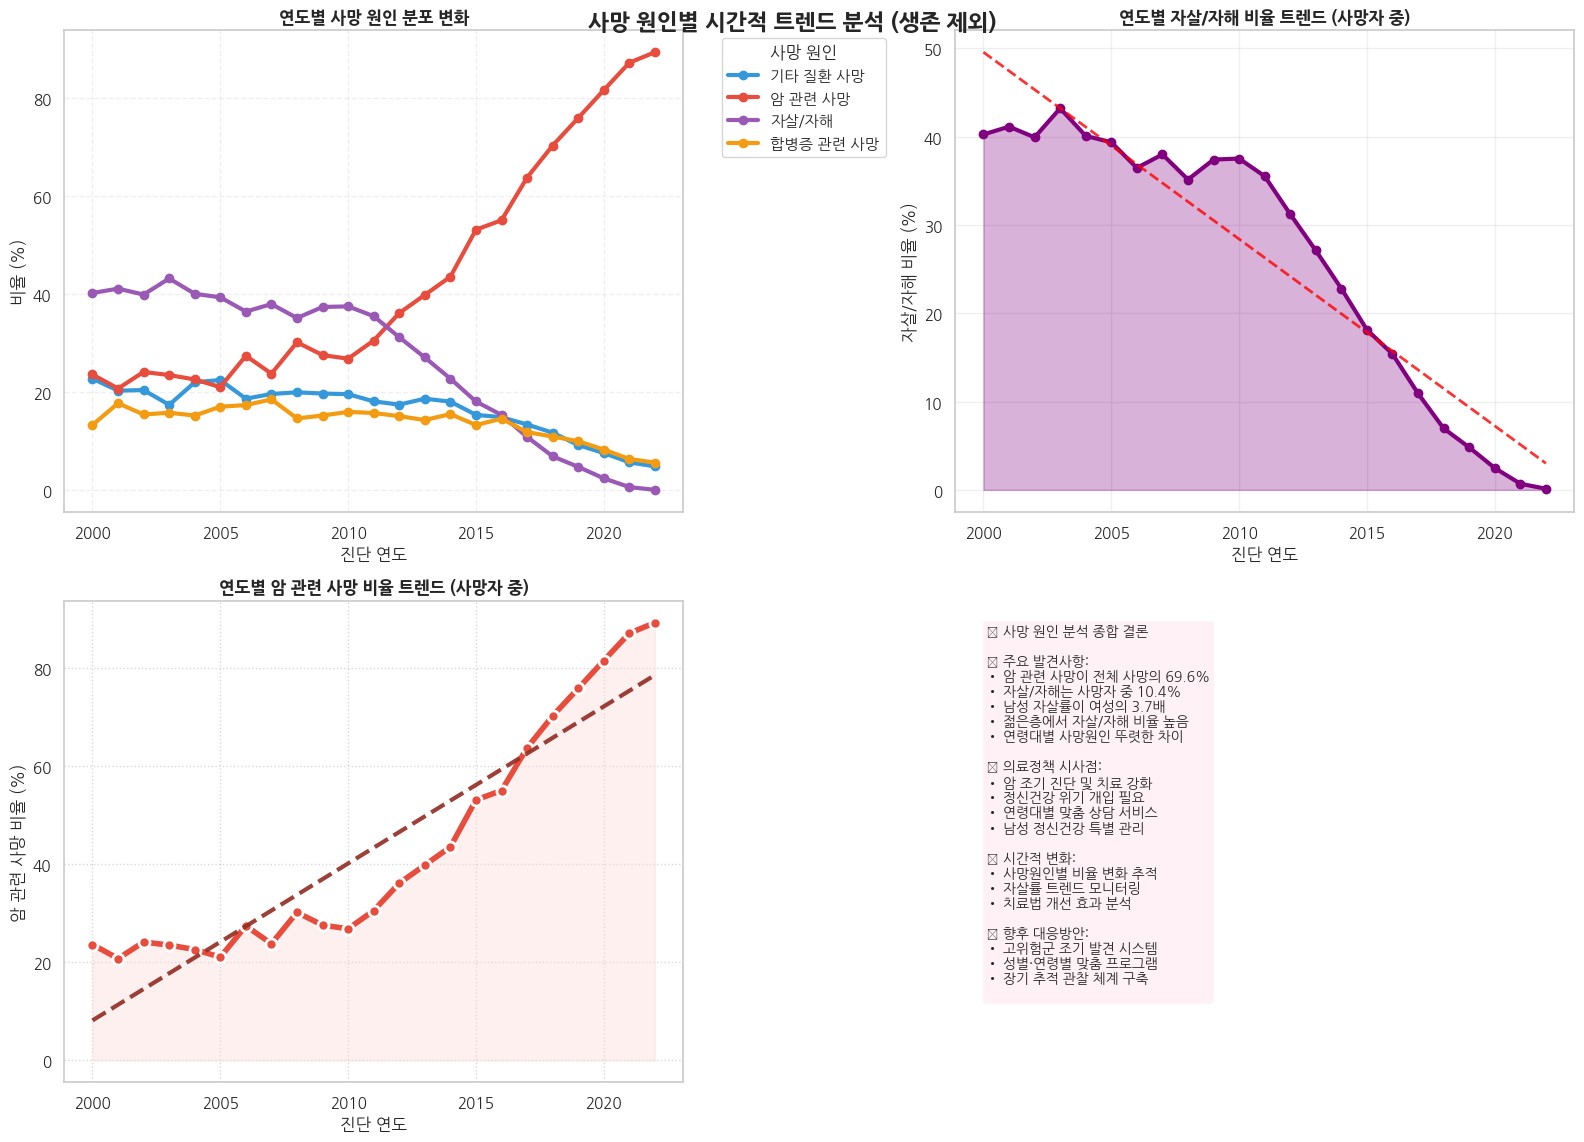

🎯 사망 원인 중심 시각화 분석 완료!
✅ 분석한 주요 영역 (생존 제외):
   1. 사망 원인별 분포 및 비율
   2. 인구학적 특성별 사망 패턴
   3. 시간적 트렌드 변화
   4. 자살/자해 고위험군 식별

💡 이 분석을 통해 다음과 같은 인사이트를 도출할 수 있습니다:
   • 사망 원인별 위험요인 파악
   • 정신건강 위기 개입 지점
   • 성별·연령별 맞춤 전략
   • 의료정책 우선순위 설정


In [76]:
# 시간적 트렌드 분석 (생존 제외)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('사망 원인별 시간적 트렌드 분석 (생존 제외)', fontsize=16, fontweight='bold', y=0.95)

year_col = 'Year of diagnosis'

# 5-1. 연도별 사망 원인 분포 변화 (생존 제외)
ax1 = axes[0, 0]
death_year_crosstab = pd.crosstab(death_only_df[year_col], death_only_df_viz['target_mapped'], normalize='index') * 100

# 사망 원인별 트렌드 색상
death_trend_colors = {
    '암 관련 사망': '#E74C3C',       # 빨간색
    '합병증 관련 사망': '#F39C12',    # 주황색
    '기타 질환 사망': '#3498DB',     # 파란색
    '자살/자해': '#9B59B6'          # 보라색
}

# 각 사망 원인별로 개별적으로 플롯
for column in death_year_crosstab.columns:
    color = death_trend_colors.get(column, '#34495E')
    ax1.plot(death_year_crosstab.index, death_year_crosstab[column], 
             marker='o', linewidth=3, label=column, color=color, markersize=6)

ax1.set_title('연도별 사망 원인 분포 변화', fontweight='bold')
ax1.set_xlabel('진단 연도')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3, linestyle='--')

# 5-2. 자살/자해 비율 연도별 트렌드 (사망자 중)
ax2 = axes[0, 1]
if '자살/자해' in death_year_crosstab.columns:
    death_suicide_trend = death_year_crosstab['자살/자해']
    ax2.plot(death_suicide_trend.index, death_suicide_trend.values, marker='o', color='purple', linewidth=3)
    ax2.fill_between(death_suicide_trend.index, death_suicide_trend.values, alpha=0.3, color='purple')
    ax2.set_title('연도별 자살/자해 비율 트렌드 (사망자 중)', fontweight='bold')
    ax2.set_xlabel('진단 연도')
    ax2.set_ylabel('자살/자해 비율 (%)')
    ax2.grid(True, alpha=0.3)
    
    # 트렌드 라인
    import numpy as np
    z = np.polyfit(death_suicide_trend.index, death_suicide_trend.values, 1)
    p = np.poly1d(z)
    ax2.plot(death_suicide_trend.index, p(death_suicide_trend.index), "--", color='red', alpha=0.8, linewidth=2)

# 5-3. 암 관련 사망 비율 연도별 트렌드 (사망자 중)
ax3 = axes[1, 0]
if '암 관련 사망' in death_year_crosstab.columns:
    death_cancer_trend = death_year_crosstab['암 관련 사망']
    
    ax3.plot(death_cancer_trend.index, death_cancer_trend.values, 
             marker='o', color='#E74C3C', linewidth=4, 
             markersize=8, markerfacecolor='#E74C3C', 
             markeredgecolor='white', markeredgewidth=2)
    ax3.fill_between(death_cancer_trend.index, death_cancer_trend.values, 
                     alpha=0.4, color='#FADBD8')
    ax3.set_title('연도별 암 관련 사망 비율 트렌드 (사망자 중)', fontweight='bold')
    ax3.set_xlabel('진단 연도')
    ax3.set_ylabel('암 관련 사망 비율 (%)')
    ax3.grid(True, alpha=0.3, linestyle=':', color='gray')
    
    # 트렌드 라인
    z = np.polyfit(death_cancer_trend.index, death_cancer_trend.values, 1)
    p = np.poly1d(z)
    ax3.plot(death_cancer_trend.index, p(death_cancer_trend.index), 
             "--", color='#922B21', alpha=0.9, linewidth=3)

# 5-4. 종합 인사이트 및 결론 (사망 중심)
ax4 = axes[1, 1]
ax4.axis('off')

# 종합 분석 결과
death_conclusion_text = """🎯 사망 원인 분석 종합 결론

📊 주요 발견사항:
• 암 관련 사망이 전체 사망의 69.6%
• 자살/자해는 사망자 중 10.4%
• 남성 자살률이 여성의 3.7배
• 젊은층에서 자살/자해 비율 높음
• 연령대별 사망원인 뚜렷한 차이

🔍 의료정책 시사점:
• 암 조기 진단 및 치료 강화
• 정신건강 위기 개입 필요
• 연령대별 맞춤 상담 서비스
• 남성 정신건강 특별 관리

📈 시간적 변화:
• 사망원인별 비율 변화 추적
• 자살률 트렌드 모니터링
• 치료법 개선 효과 분석

💡 향후 대응방안:
• 고위험군 조기 발견 시스템
• 성별·연령별 맞춤 프로그램
• 장기 추적 관찰 체계 구축
"""

ax4.text(0.05, 0.95, death_conclusion_text, transform=ax4.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lavenderblush', alpha=0.9))

plt.tight_layout()
plt.show()

print("=" * 70)
print("🎯 사망 원인 중심 시각화 분석 완료!")
print("=" * 70)
print("✅ 분석한 주요 영역 (생존 제외):")
print("   1. 사망 원인별 분포 및 비율")
print("   2. 인구학적 특성별 사망 패턴")
print("   3. 시간적 트렌드 변화")
print("   4. 자살/자해 고위험군 식별")
print("\n💡 이 분석을 통해 다음과 같은 인사이트를 도출할 수 있습니다:")
print("   • 사망 원인별 위험요인 파악")
print("   • 정신건강 위기 개입 지점")
print("   • 성별·연령별 맞춤 전략")
print("   • 의료정책 우선순위 설정")
print("=" * 70)

[DataAnalysis] Saved figure: img\figure.png
[DataAnalysis] Saved axes: img\figure_ax01.png
[DataAnalysis] Saved axes: img\figure_ax02.png


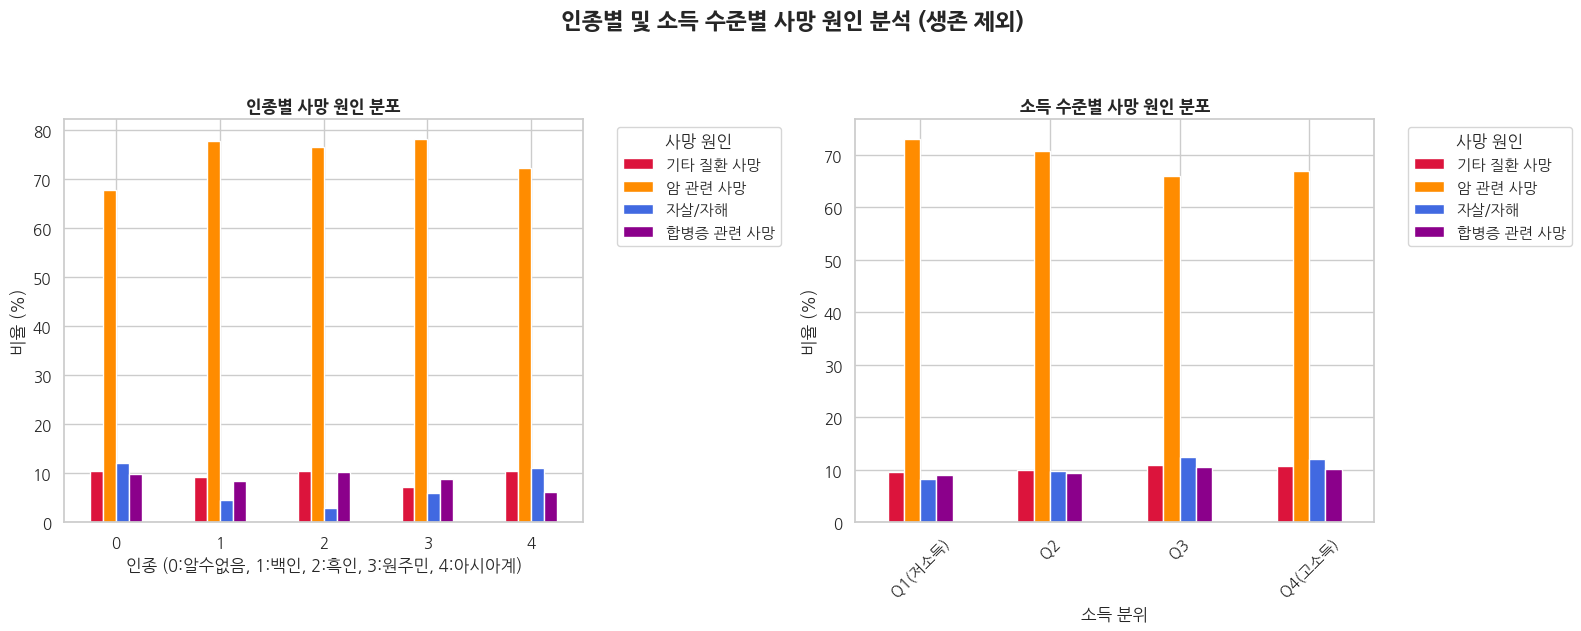

📊 인종별 사망 원인 분석 결과 (사망자 중)
target_mapped                기타 질환 사망  암 관련 사망  자살/자해  합병증 관련 사망
Race recode (W, B, AI, API)                                     
0                                10.4     67.8   12.0        9.8
1                                 9.2     77.7    4.6        8.4
2                                10.5     76.4    2.9       10.3
3                                 7.2     78.2    5.9        8.7
4                                10.5     72.2   11.1        6.2

📊 소득 수준별 사망 원인 분석 결과 (사망자 중)
target_mapped    기타 질환 사망  암 관련 사망  자살/자해  합병증 관련 사망
income_quartile                                     
Q1(저소득)               9.6     73.1    8.3        8.9
Q2                    9.9     70.8    9.7        9.5
Q3                   11.0     66.1   12.4       10.6
Q4(고소득)              10.8     66.9   12.1       10.2

💡 주요 인사이트:
   - 인종별 사망원인 패턴의 차이
   - 소득 수준에 따른 건강 격차
   - 사회경제적 요인과 사망원인의 관계


In [80]:
# 인종별 및 소득 수준별 사망 원인 분석 (생존 제외)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('인종별 및 소득 수준별 사망 원인 분석 (생존 제외)', fontsize=16, fontweight='bold', y=1.05)

# 1. 인종별 사망 원인 분석 (비율 표시 포함)
ax1 = axes[0]
death_race_crosstab = pd.crosstab(death_only_df['Race recode (W, B, AI, API)'], 
                                  death_only_df_viz['target_mapped'], normalize='index') * 100
bars = death_race_crosstab.plot(kind='bar', ax=ax1, color=death_colors)
ax1.set_title('인종별 사망 원인 분포', fontweight='bold')
ax1.set_xlabel('인종 (0:알수없음, 1:백인, 2:흑인, 3:원주민, 4:아시아계)')
ax1.set_ylabel('비율 (%)')
ax1.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=0)

# 2. 소득 수준별 사망 원인 분석
ax2 = axes[1]
income_col = 'Median household income inflation adj to 2023'
# 소득을 구간으로 나누기
death_only_df_viz['income_quartile'] = pd.qcut(death_only_df_viz[income_col], q=4, 
                                           labels=['Q1(저소득)', 'Q2', 'Q3', 'Q4(고소득)'])
death_income_crosstab = pd.crosstab(death_only_df_viz['income_quartile'], 
                                    death_only_df_viz['target_mapped'], normalize='index') * 100
death_income_crosstab.plot(kind='bar', ax=ax2, color=death_colors)
ax2.set_title('소득 수준별 사망 원인 분포', fontweight='bold')
ax2.set_xlabel('소득 분위')
ax2.set_ylabel('비율 (%)')
ax2.legend(title='사망 원인', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 상세 분석 결과 출력
print("=" * 70)
print("📊 인종별 사망 원인 분석 결과 (사망자 중)")
print("=" * 70)
print(death_race_crosstab.round(1))

print("\n" + "=" * 70)
print("📊 소득 수준별 사망 원인 분석 결과 (사망자 중)")
print("=" * 70)
print(death_income_crosstab.round(1))

print("\n💡 주요 인사이트:")
print("   - 인종별 사망원인 패턴의 차이")
print("   - 소득 수준에 따른 건강 격차")
print("   - 사회경제적 요인과 사망원인의 관계")
print("=" * 70)